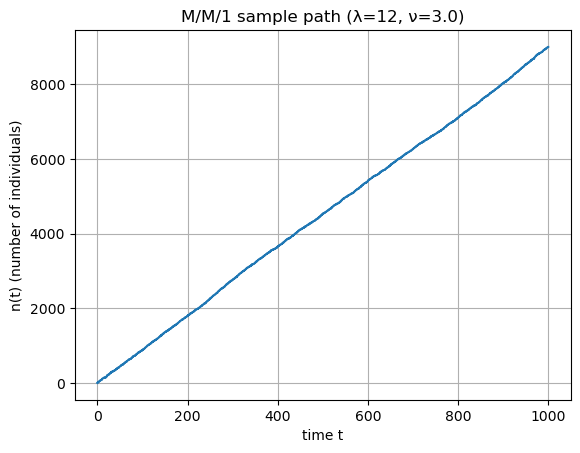

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1(lambda_rate, nu_rate, T_max, n0=0, random_seed=None):
    """
    Simulate an M/M/1 CTMC (queue length process).
    
    Parameters
    ----------
    lambda_rate : float
        Arrival rate (λ)
    nu_rate : float
        Departure rate (ν)
    T_max : float
        Final simulation time
    n0 : int, optional
        Initial number in the system, default 0
    random_seed : int or None
        Seed for reproducibility
        
    Returns
    -------
    times : list of float
        Event times (including t=0 and possibly T_max)
    states : list of int
        Corresponding number in the system at those times
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    t = 0.0
    n = n0
    
    times = [t]
    states = [n]
    
    while t < T_max:
        # Compute total rate out of current state
        if n == 0:
            total_rate = lambda_rate
        else:
            total_rate = lambda_rate + nu_rate
        
        # Safety check: if total_rate is zero, no more events
        if total_rate <= 0:
            # Extend flat line to T_max
            times.append(T_max)
            states.append(n)
            break
        
        # Sample time to next event from Exp(total_rate)
        dt = np.random.exponential(scale=1.0 / total_rate)
        
        if t + dt > T_max:
            # Stop at T_max, state stays the same
            times.append(T_max)
            states.append(n)
            break
        
        t += dt
        
        # Decide which event occurs
        if np.random.rand() < lambda_rate / total_rate:
            # Arrival
            n += 1
        else:
            # Departure (only if n > 0)
            n -= 1
        
        times.append(t)
        states.append(n)
    
    return times, states


# Example usage
def start():
    lambda_rate = 12  # arrival rate λ
    nu_rate = 3.0      # service rate ν
    T_max = 1000.0       # simulate up to time 20
    
    times, states = simulate_mm1(lambda_rate, nu_rate, T_max, n0=0, random_seed=42)
    
    # Plot n(t) as a step function
    plt.figure()
    plt.step(times, states, where="post")
    plt.xlabel("time t")
    plt.ylabel("n(t) (number of individuals)")
    plt.title(f"M/M/1 sample path (λ={lambda_rate}, ν={nu_rate})")
    plt.grid(True)
    plt.show()
    

start()

Simulation results:
  Final time          : 55.2788
  Final state (busy)  : 0
  Events simulated    : 100
  Total arrivals      : 53
  Lost calls          : 6
  Proportion lost     : 0.1132


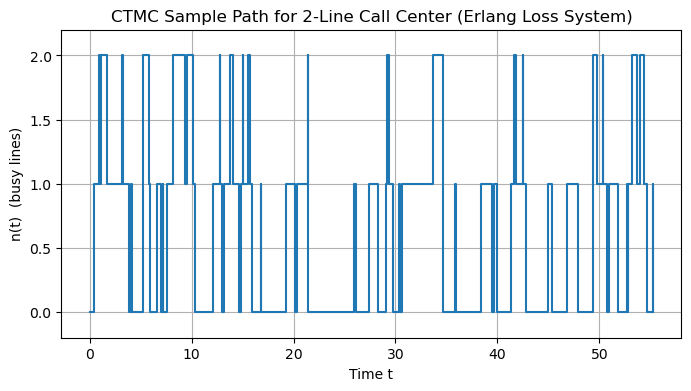

In [4]:
import random
import math
import matplotlib.pyplot as plt

def simulate_call_center(lmbda, mu, n_events=50, seed=None):
    """
    Simulate the 2-line call center as a CTMC for n_events events.
    Also records the full time/state trajectory for plotting.

    lmbda: arrival rate (lambda)
    mu: service rate per busy line
    n_events: number of events (arrivals attempts + departures)
    seed: optional random seed for reproducibility
    """

    if seed is not None:
        random.seed(seed)

    # Initial conditions
    t = 0.0
    n = 0  
    events = 0

    arrivals = 0
    lost = 0

    # For plotting: time series of process n(t)
    times = [t]
    states = [n]

    while events < n_events:
        # total rate
        R = lmbda + n * mu
        if R == 0:
            break

        # next event time
        u = random.random()
        delta_t = -math.log(u) / R
        t += delta_t

        # event type
        u2 = random.random()
        if u2 < lmbda / R:
            # Arrival
            arrivals += 1
            if n < 2:
                n += 1       # accepted
            else:
                lost += 1    # rejected
        else:
            # Departure
            if n > 0:
                n -= 1

        events += 1

        # Save for plotting
        times.append(t)
        states.append(n)

    proportion_lost = lost / arrivals if arrivals > 0 else 0.0

    return {
        "final_time": t,
        "final_state": n,
        "events_simulated": events,
        "total_arrivals": arrivals,
        "lost_calls": lost,
        "lost_proportion": proportion_lost,
        "times": times,
        "states": states,
    }


# Example usage:
def mm2():
    lmbda = 1.0  # arrival rate
    mu = 1.5     # service rate per busy line

    result = simulate_call_center(lmbda, mu, n_events=100, seed=42)

    print("Simulation results:")
    print(f"  Final time          : {result['final_time']:.4f}")
    print(f"  Final state (busy)  : {result['final_state']}")
    print(f"  Events simulated    : {result['events_simulated']}")
    print(f"  Total arrivals      : {result['total_arrivals']}")
    print(f"  Lost calls          : {result['lost_calls']}")
    print(f"  Proportion lost     : {result['lost_proportion']:.4f}")

    # ---- PLOT THE CTMC PATH ----
    plt.figure(figsize=(8,4))
    plt.step(result["times"], result["states"], where="post")
    plt.xlabel("Time t")
    plt.ylabel("n(t)  (busy lines)")
    plt.title("CTMC Sample Path for 2-Line Call Center (Erlang Loss System)")
    plt.ylim(-0.2, 2.2)
    plt.grid(True)
    plt.show()


mm2()